In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Cleaning

In [3]:
# removing unwanted column
df.drop( columns = 'index', inplace = True)

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Dataset Information 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


## Statistical Summary about the Dataset

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Filtering

In [7]:
# max flight price details
df[df['price'] == 123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [8]:
# max duration of flight details
df[df['duration'] == 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [9]:
# max days left flight details
df[df['days_left'] == 49.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9782,Vistara,UK-975,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.00,49,2476
9783,Vistara,UK-953,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9784,Vistara,UK-981,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9785,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,49,2700
9786,Vistara,UK-993,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.17,49,2700
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## What are the airlines in the dataset, accompanied by their frequencies?

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
# checking number of airlines in the dataset
df['airline'].nunique()

6

In [12]:
# showing airline names in the dataset
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [13]:
# showing all the Airline names with their Frequencies
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

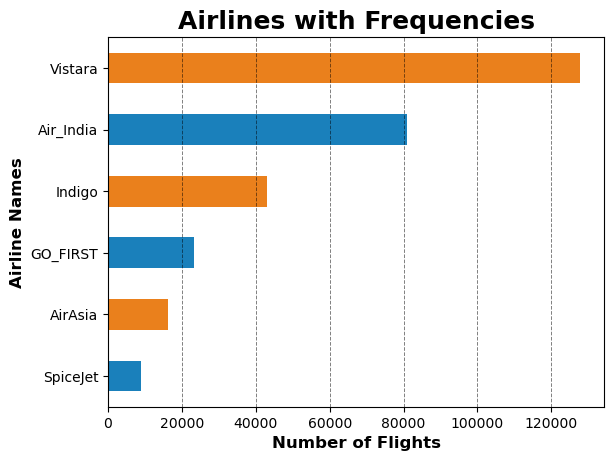

In [14]:
# plotting Airline names with their frequencies in a Horizontal Bar Graph
df['airline'].value_counts(ascending=True).plot.barh( color= ['#1a80bb', '#ea801c'])

plt.title('Airlines with Frequencies', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xlabel('Number of Flights', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Airline Names', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='x', alpha=0.5, linestyle='--', linewidth=0.7, color= 'black')
plt.show()

## Visualizing Flights Frequency at Departure Time and Arrival Time

In [15]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
# Departure Time Flight Frequency
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [17]:
# Arrival Time Flight Frequency
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

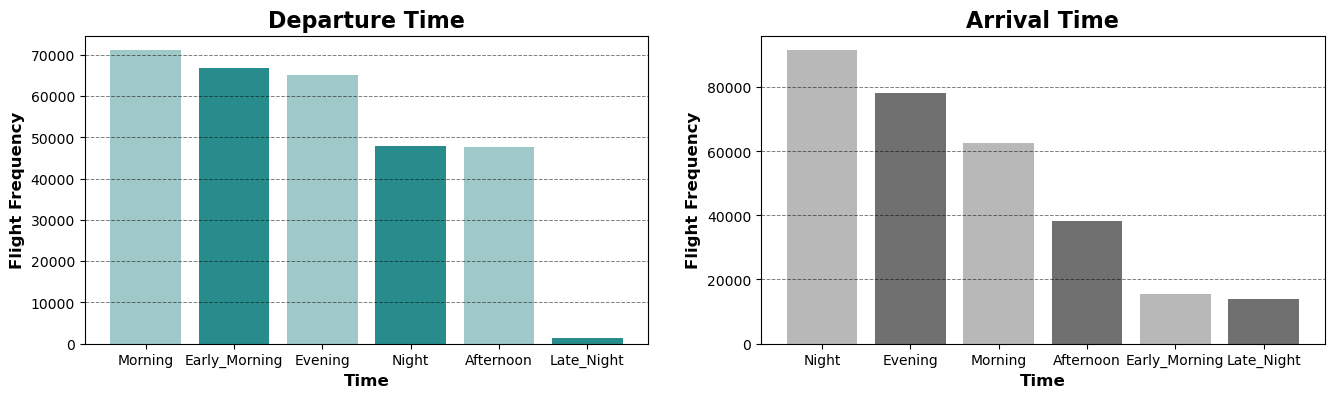

In [ ]:
# plotting 
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(df['departure_time'].value_counts().index, df['departure_time'].value_counts().values, color= ['#9fc8c8', '#298c8c'] )
plt.title('Departure Time', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Time', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Flight Frequency', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color= 'black') 

plt.subplot(1,2,2)
plt.bar(df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values, color = ['#b8b8b8', '#707070'] )
plt.title('Arrival Time', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Time', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Flight Frequency', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color= 'black')



plt.show()

## Visualizing Flight Frequency at Source City and Destination City

In [19]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Flight Frequency at Source City
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [21]:
# Flight Frequency at Destination City
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

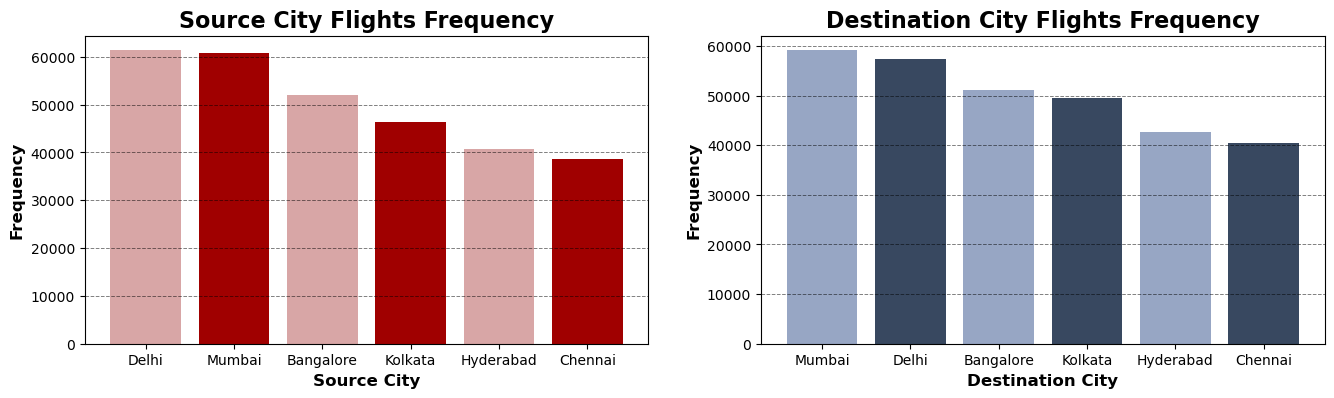

In [31]:
# plotting
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(df['source_city'].value_counts().index, df['source_city'].value_counts().values, color = ['#d8a6a6', '#a00000'])
plt.title('Source City Flights Frequency', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Source City', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color='black')

plt.subplot(1,2,2)

plt.bar(df['destination_city'].value_counts().index, df['destination_city'].value_counts().values, color = ['#97a6c4', '#384860'] )
plt.title('Destination City Flights Frequency', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Destination City', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color='black')

plt.show()

## Does Price varies with Airlines?

In [35]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [37]:
# Checking Price Variation of Airlines
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

Visualizing Price Variations with Airlines

<Figure size 1000x400 with 0 Axes>

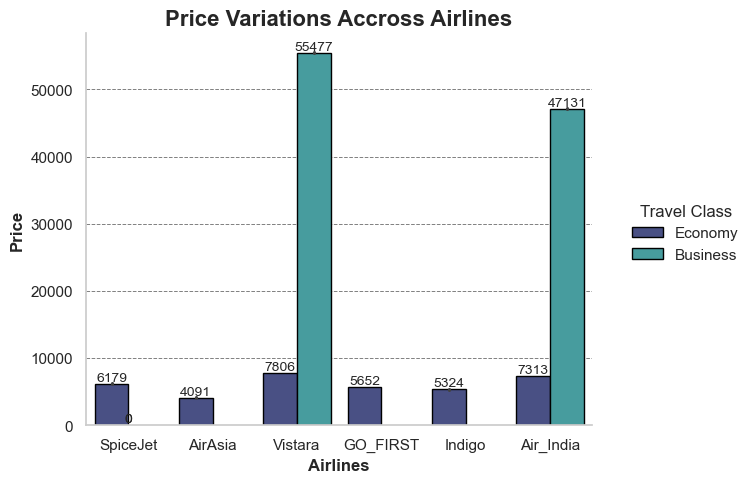

In [111]:
# plotting
plt.figure(figsize=(10,4))

ax = sns.catplot(data=df, x="airline", y="price", kind="bar", palette= 'mako', hue='class', legend= True, edgecolor='black', linewidth=1)

plt.title('Price Variations Accross Airlines', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Airlines', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.ylabel('Price', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.grid(axis='y', alpha= 0.5, linestyle='--', color='black', linewidth=0.7)
ax._legend.set_title('Travel Class')
ax._legend.set_bbox_to_anchor((1,0.5))
ax._legend.set_loc('center left')

for bar in ax.ax.patches:
    ax.ax.annotate(
        f"{int(bar.get_height())}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

## Does Ticket Price change based on the Departure Time and Arrival Time?

In [112]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# checking ticket price variation during departure time
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [115]:
# checking ticket price variation during arrival time
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64